In [1]:
pip install networkx

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/2.0 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


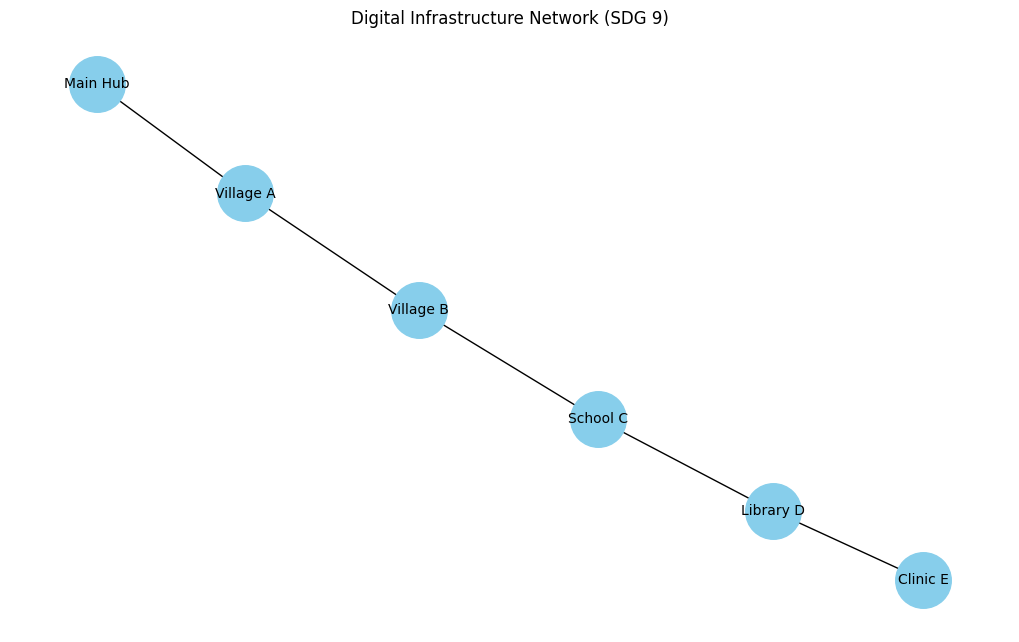

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes (education access points)
nodes = ["Main Hub", "Village A", "Village B", "School C", "Library D", "Clinic E"]
G.add_nodes_from(nodes)

# Add edges (fiber connections)
G.add_edges_from([
    ("Main Hub", "Village A"),
    ("Village A", "Village B"),
    ("Village B", "School C"),
    ("School C", "Library D"),
    ("Library D", "Clinic E")
])

# Draw the graph
plt.figure(figsize=(10,6))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1600, font_size=10)
plt.title("Digital Infrastructure Network (SDG 9)")
plt.show()

In [3]:
print("Is the network fully connected?", nx.is_connected(G))
print("Number of nodes:", G.number_of_nodes())
print("Number of connections (edges):", G.number_of_edges())

# Degree of each node
for node in G.nodes():
    print(f"{node} has {G.degree(node)} connections")

Is the network fully connected? True
Number of nodes: 6
Number of connections (edges): 5
Main Hub has 1 connections
Village A has 2 connections
Village B has 2 connections
School C has 2 connections
Library D has 2 connections
Clinic E has 1 connections


In [4]:
G.remove_edge("Library D", "Clinic E")
print("After removal, connected?", nx.is_connected(G))

After removal, connected? False


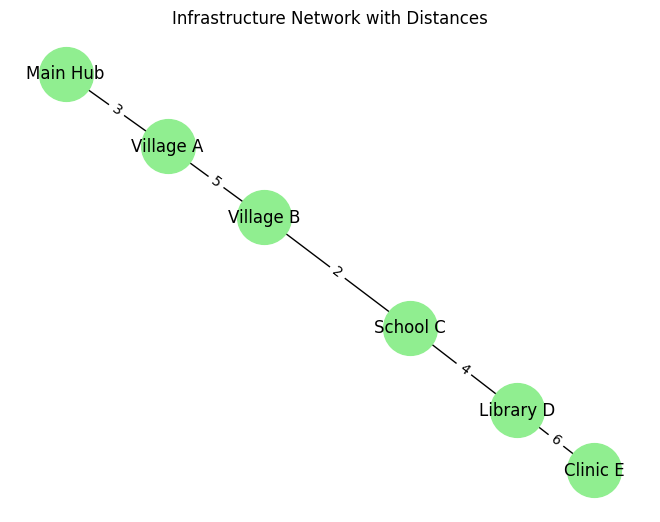

In [5]:
G_weighted = nx.Graph()

# Add weighted edges (distance in km)
G_weighted.add_weighted_edges_from([
    ("Main Hub", "Village A", 3),
    ("Village A", "Village B", 5),
    ("Village B", "School C", 2),
    ("School C", "Library D", 4),
    ("Library D", "Clinic E", 6)
])

# Draw with edge weights
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True, node_color="lightgreen", node_size=1500)
edge_labels = nx.get_edge_attributes(G_weighted, "weight")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels)
plt.title("Infrastructure Network with Distances")
plt.show()

In [6]:
shortest = nx.shortest_path(G_weighted, source="Main Hub", target="Clinic E", weight="weight")
print("Shortest path (weighted):", shortest)

length = nx.shortest_path_length(G_weighted, source="Main Hub", target="Clinic E", weight="weight")
print("Total distance:", length, "km")

Shortest path (weighted): ['Main Hub', 'Village A', 'Village B', 'School C', 'Library D', 'Clinic E']
Total distance: 20 km


In [7]:
# Change one connection’s weight and recompute
G_weighted["Library D"]["Clinic E"]["weight"] = 2